Importing necessary libraries and reading data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

In [2]:
df = pd.read_csv('..\\csv_data\\redditIndia2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                1200 non-null   object 
 1   score                1200 non-null   int64  
 2   id                   1200 non-null   object 
 3   url                  1200 non-null   object 
 4   comms_num            1200 non-null   int64  
 5   created              1200 non-null   float64
 6   body                 514 non-null    object 
 7   author               1200 non-null   object 
 8   flair                1200 non-null   object 
 9   over_18              1200 non-null   bool   
 10  comments             1149 non-null   object 
 11  authors              1149 non-null   object 
 12  title_comments_body  1200 non-null   object 
 13  title_comments_url   1200 non-null   object 
 14  all_features         1200 non-null   object 
 15  title_comments       1200 non-null   o

In [3]:
df.fillna("",inplace = True)

Storing the word count of respective title,body and comments

In [4]:
df['title_word_count'] = [len(y.split()) for y in list(df['title'])]
df['body_word_count']= [len(y.split()) for y in list(df['body'])]
df['comments_word_count'] =[len(y.split()) for y in list(df['comments'])]

df['combined_word_count'] = df['title_word_count'] + df['body_word_count'] + df['comments_word_count']


In [5]:
df['flair'].value_counts()

Photography           100
Sports                100
AMA                   100
Policy/Economy        100
Non-Political         100
Food                  100
Science/Technology    100
Scheduled             100
[R]eddiquette         100
Business/Finance      100
Politics              100
AskIndia              100
Name: flair, dtype: int64

#### Average number of comments per post

Text(0, 0.5, 'Average number of comments')

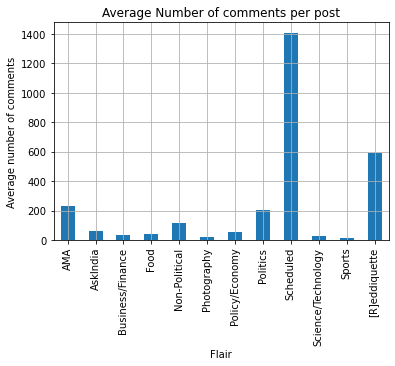

In [6]:
df_cn = df.groupby("flair").mean()[['comms_num']]

df_cn.plot(kind='bar', legend=False, grid=True)
plt.title("Average Number of comments per post")

plt.xlabel("Flair")
plt.ylabel("Average number of comments")

#### Average number of words per respective features

Text(0, 0.5, 'Average number of words in title')

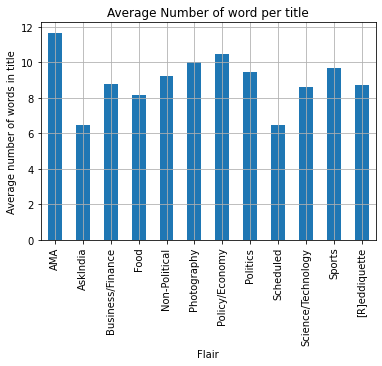

In [7]:
df_cn = df.groupby("flair").mean()[['title_word_count']]

df_cn.plot(kind='bar', legend=False, grid=True)
plt.title("Average Number of word per title")

plt.xlabel("Flair")
plt.ylabel("Average number of words in title")


Text(0, 0.5, 'Average number of words in post body')

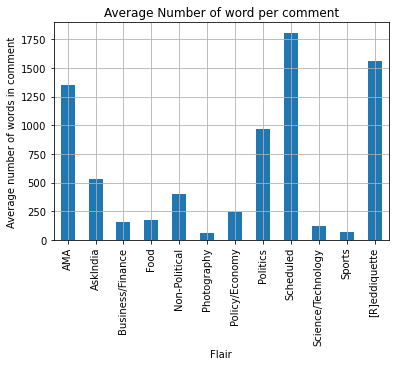

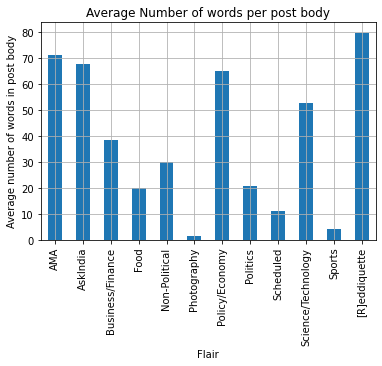

In [8]:

df_cn = df.groupby("flair").mean()[['comments_word_count']]

df_cn.plot(kind='bar', legend=False, grid=True)
plt.title("Average Number of word per comment")

plt.xlabel("Flair")
plt.ylabel("Average number of words in comment")

df_cn = df.groupby("flair").mean()[['body_word_count']]

df_cn.plot(kind='bar', legend=False, grid=True)
plt.title("Average Number of words per post body")

plt.xlabel("Flair")
plt.ylabel("Average number of words in post body")


Text(0, 0.5, 'Average number of combined words in data')

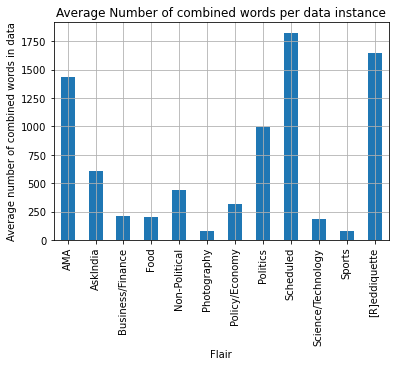

In [9]:

df_cn = df.groupby("flair").mean()[['combined_word_count']]

df_cn.plot(kind='bar', legend=False, grid=True)
plt.title("Average Number of combined words per data instance")

plt.xlabel("Flair")
plt.ylabel("Average number of combined words in data")

In [10]:
print(df['title_word_count'].describe())
print(df['body_word_count'].describe())
df['comments_word_count'].describe()
df['combined_word_count'].describe()

count    1200.000000
mean        8.982500
std         5.490961
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        36.000000
Name: title_word_count, dtype: float64
count    1200.000000
mean       38.526667
std       117.478311
min         0.000000
25%         0.000000
50%         0.000000
75%        27.250000
max      1481.000000
Name: body_word_count, dtype: float64


count     1200.000000
mean       668.211667
std       1638.258161
min          3.000000
25%         84.000000
50%        230.500000
75%        663.250000
max      35981.000000
Name: combined_word_count, dtype: float64

#### Distribution of number of words in the respective features

Text(0, 0.5, 'Number of posts')

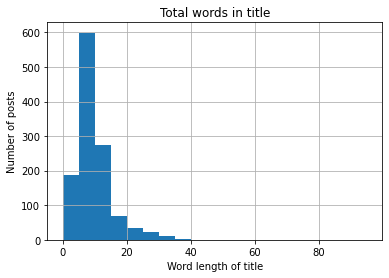

In [11]:
df['title_word_count'].hist(bins = range(0,100,5))
plt.title("Total words in title")
plt.xlabel("Word length of title")
plt.ylabel("Number of posts")

Text(0, 0.5, 'Number of posts')

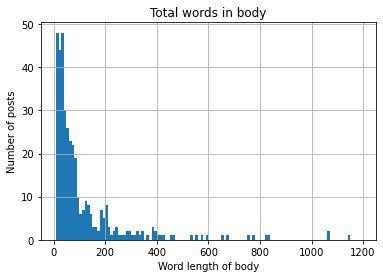

In [12]:
df['body_word_count'].hist(bins = range(10,len(df),10))
plt.title("Total words in body")
plt.xlabel("Word length of body")
plt.ylabel("Number of posts")

Text(0, 0.5, 'Number of posts')

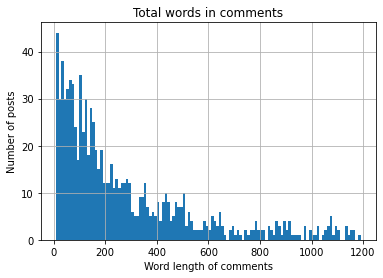

In [13]:
df['comments_word_count'].hist(bins = range(10,len(df),10))
plt.title("Total words in comments")
plt.xlabel("Word length of comments")
plt.ylabel("Number of posts")

Text(0, 0.5, 'Number of posts')

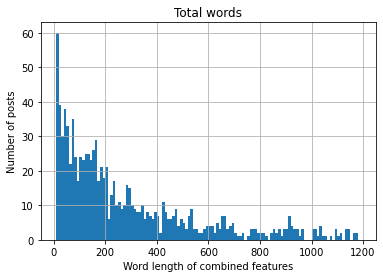

In [14]:
df['combined_word_count'].hist(bins = range(10,len(df),10))
plt.title("Total words")
plt.xlabel("Word length of combined features")
plt.ylabel("Number of posts")

In [15]:
len(df[df['combined_word_count'] <= 500])/len(df)

0.6933333333333334

In [16]:
#### Wordclouds

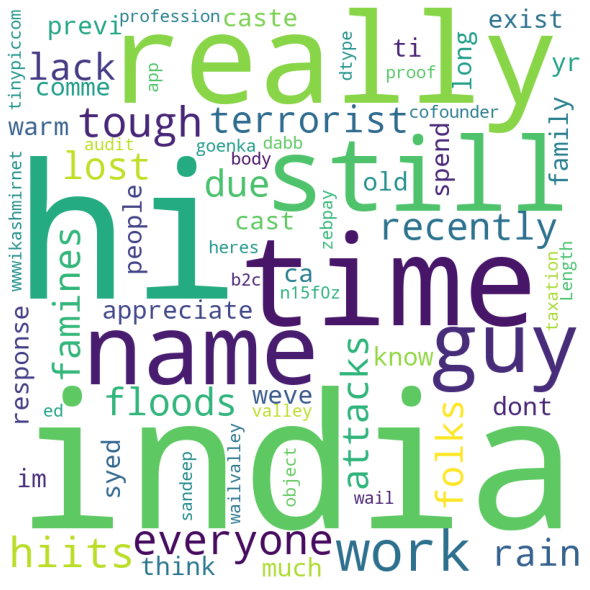

In [17]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(str(df['body'])) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

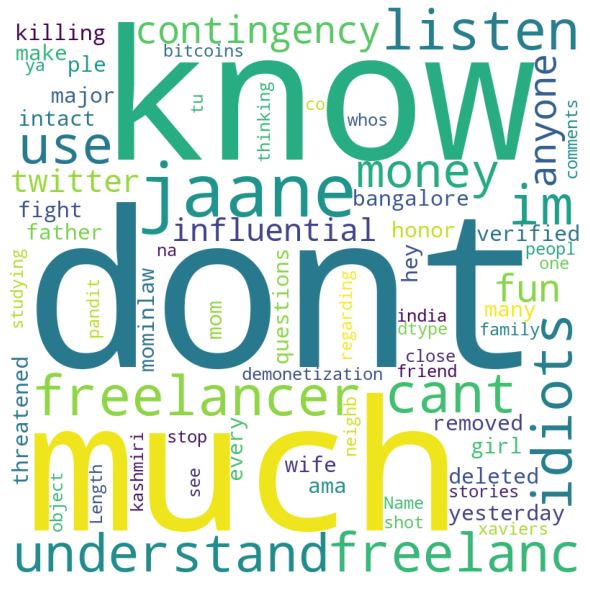

In [18]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(str(df['comments'])) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

AskIndia


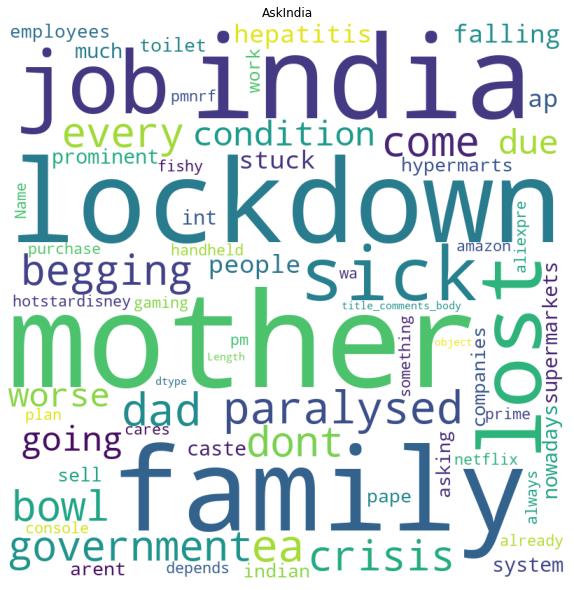

Non-Political


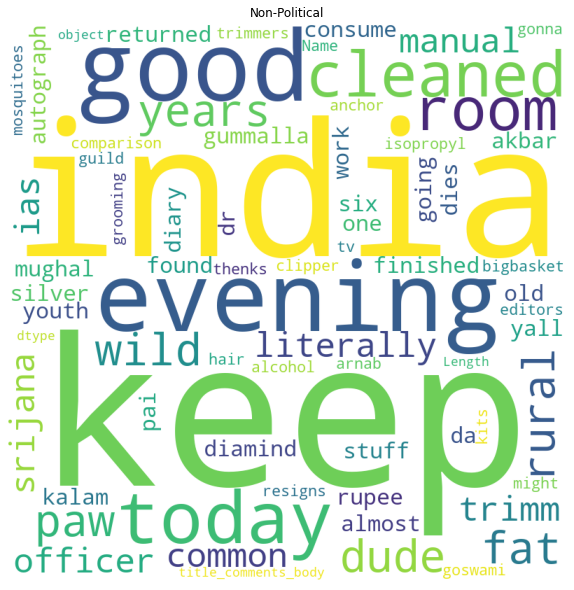

[R]eddiquette


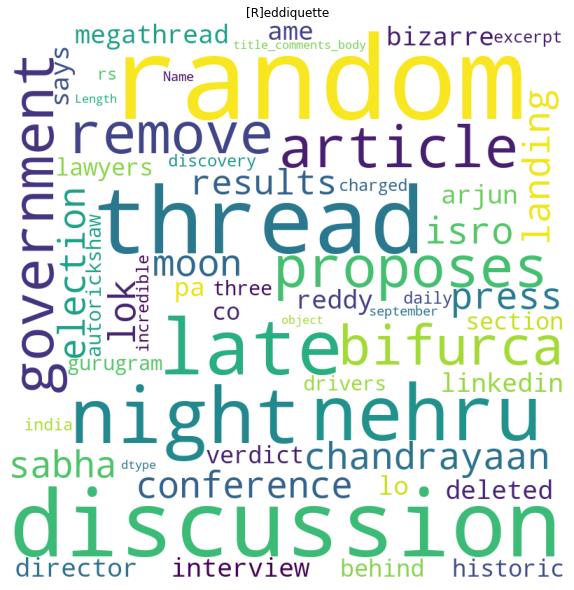

Scheduled


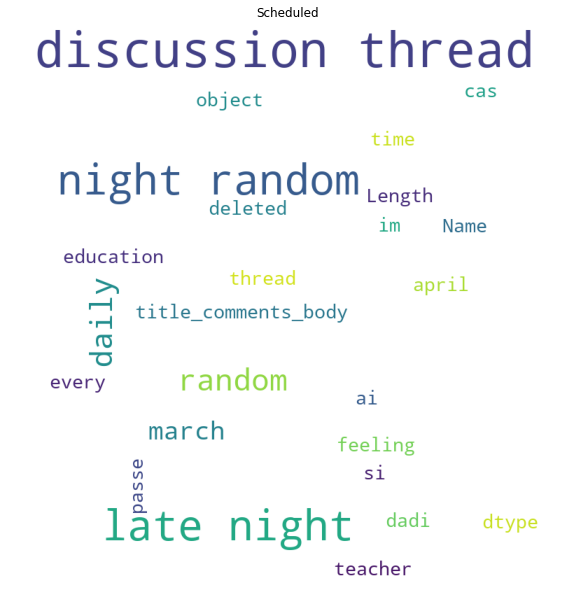

Photography


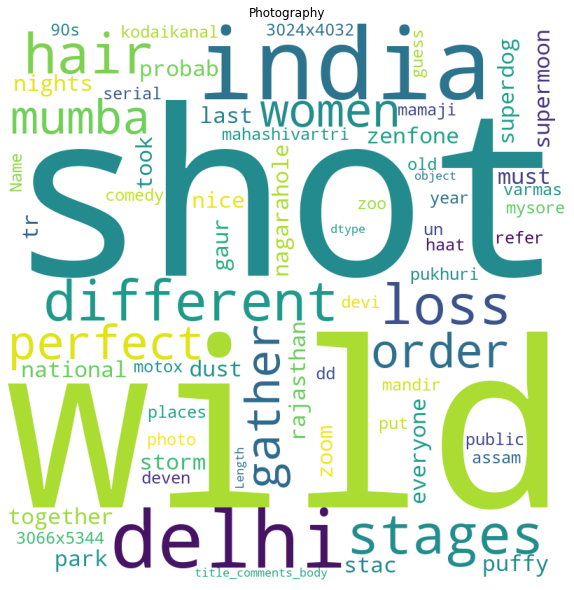

Science/Technology


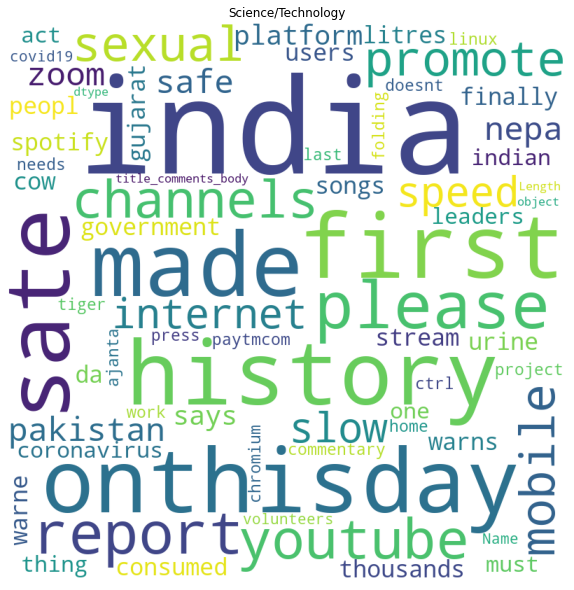

Politics


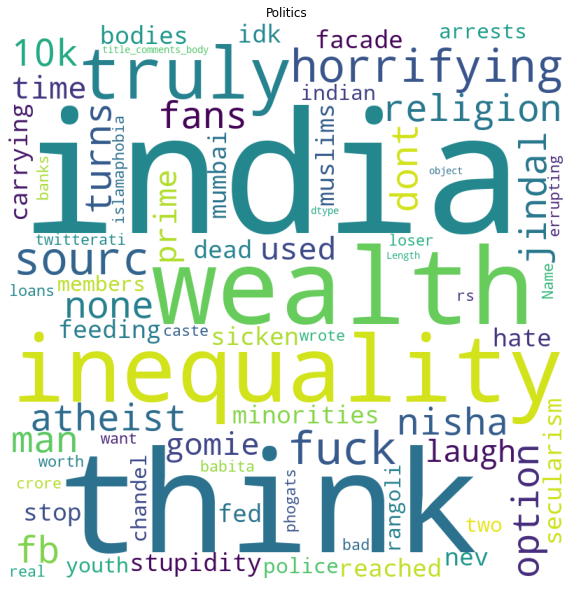

Business/Finance


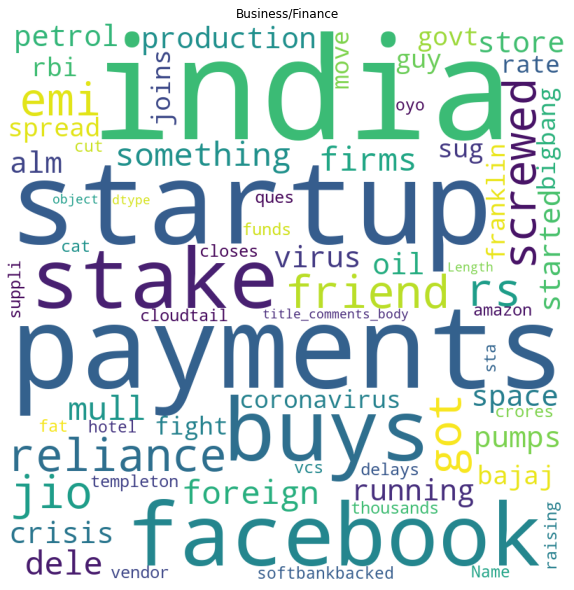

Policy/Economy


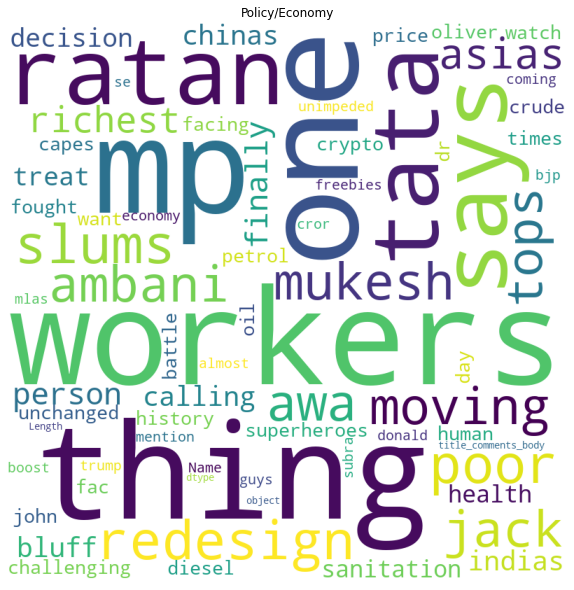

Sports


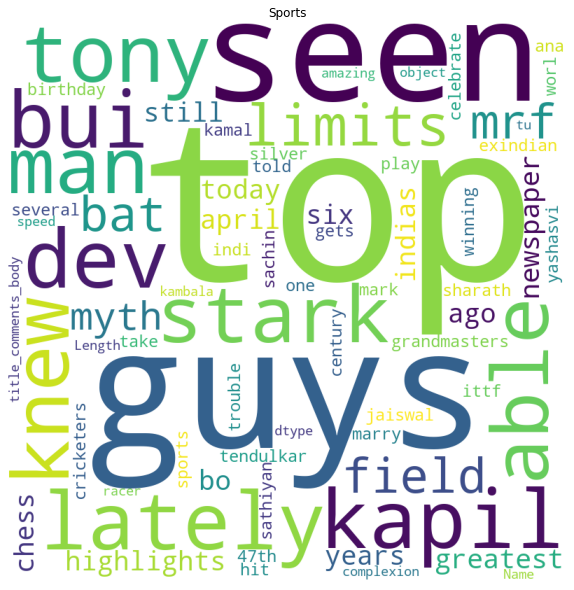

Food


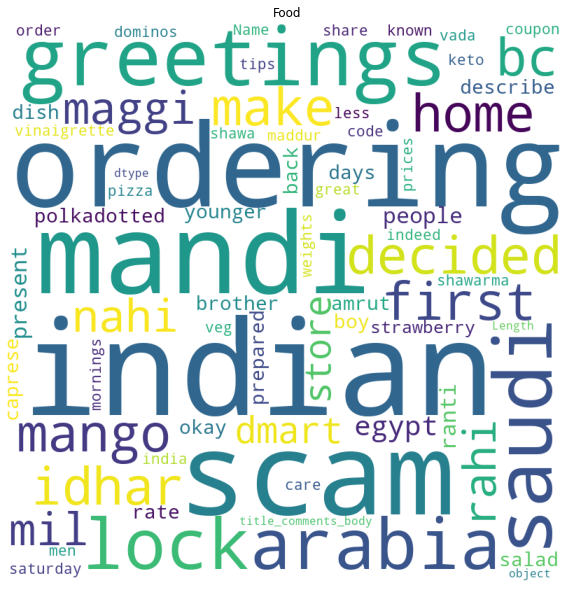

AMA


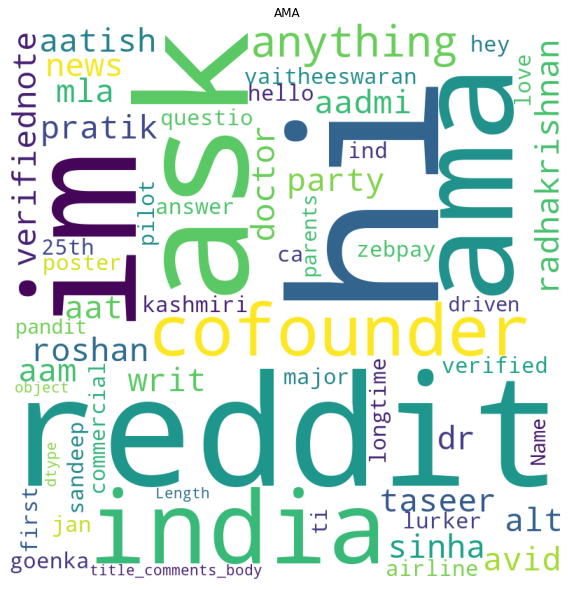

In [19]:
for fl in list(df['flair'].unique()):
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(str(df[df['flair'] == fl]['title_comments_body'])) 
# plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.title(fl)
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    print(fl)
    plt.show() 